<h2 style="text-align: center"> Marketplace Sales Performance Analysis</h2> 
<h3 style="text-align: center">Período: 01 de Setembro a 31 de Outubro de 2018<br>
    Responsável: Vinicius Duarte</h3>







### Quantos usuários distintos realizaram compras no período? 22093
<div style="font-style: italic">
select count(distinct id_user) as 'total_usuarios' from transaction;<br> </div>

### Quantas compras foram realizadas? 34941

<div style="font-style: italic">select count(*) as 'numero_compras' from transaction;</div>


### Quantos produtos foram comprados, agrupados por mês? 

<table>
  <tr>
    <th>Mes</th>
    <th>Produtos comprados</th>
  </tr>
  <tr>
    <td>9</td>
    <td>23394</td>
  </tr>
  <tr>
    <td>10</td>
    <td>29017</td>
  </tr>
</table>
<div style="font-style: italic"><br>select month(insert_date) as 'mes', Count(id_product) as 'produtos_comprados' FROM sys.transaction, sys.product_order
where transaction.id_transaction=product_order.id_transaction
group by 1;
</div>

<h3> Analisando a quantidade vendida de cada produto e a sua variação de Setembro para Outubro</h3>

A partir do comando:<br>

<div style="font-style: italic">SELECT distinct id_product as 'Product' from sys.product_order;</div><br>
obtemos a lista dos 5 produtos ofertados no marketplace.

<p>Depois, obtemos a quantidade de unidades vendidas de cada produto no mês de setembro, variando o valor do id_product da consulta de acordo com o produto de interesse.</p><br>

<div style="font-style: italic">Select count(*) from sys.product_order O 
inner join sys.transaction T<br>
on O.id_transaction = T.id_transaction
where O.id_product = 1039 and month(T.insert_date) = 9;</div>

<p>Realizamos o mesmo para o mês de Outubro, alterando month(T.insert_date) para 10. Organizando as informações em uma tabela, obtemos:</p>
<table>
    <tr>
    <caption>Unidades vendidas dos produtos dividido por mês</caption>
    <th>Produto</th>
    <th>Setembro</th>
    <th>Outubro</th>
    <th>Variação (%)</th>
    </tr>
    <tr><td>1039</td>
        <td>4586</td>
        <td>5884</td>
        <td>28</td>
    </tr>
    <tr><td>12</td>
        <td>4774</td>
        <td>5807</td>
        <td>22</td>
    </tr>
    <tr><td>10</td>
        <td>4692</td>
        <td>5683</td>
        <td>21</td>
    </tr>
    <tr><td>132</td>
        <td>4643</td>
        <td>5818</td>
        <td>25</td>
    </tr>
    <tr><td>154</td>
        <td>4699</td>
        <td>5825</td>
        <td>24</td>
    </tr>
</table>

<p>É possível visualizar que todos produtos apresentaram variação positiva entre Setembro e Outubro, denotando alta no volume de vendas.</p>

### Analisando a sazonalidade

select count(*) as 'vendas_semana' from transaction
where weekday(insert_date)<5;
<table>
    <tr>
    <th>vendas durante a semana</th>
    </tr>
    <tr><td>25592</td>
    </tr>
</table>

- 25592

select count(*) as 'vendas_fimdesemana' from transaction
where weekday(insert_date)>=5;
<table>
    <tr>
    <th>vendas durante fins de semana</th>
    </tr>
    <tr><td>9349</td>
    </tr>
</table>

- 9349
#### Fins de semana vendem mais que dias de semana? Não!

#### Levando em consideração o calendário anual de 2018 abaixo, analisaremos o desempenho de vendas semanais. Iniciando da semana 35, até a semana 44.
<img src=https://thumbs.dreamstime.com/b/calendário-anual-vermelho-99487433.jpg width="640px">


#### Houve alguma semana de pico? Sim, semana 41.
select week(insert_date,6) as 'semana', count(*) as 'total de vendas' from transaction
group by 1
order by 2 desc limit 1;
<table> 
    <caption style="font-style:italic">Semana com pico de vendas</caption>
    <tr>
    <th>Semana</th>
    <th>Total de vendas</th>
    </tr>
    <tr>
        <td>41</td>
        <td>5488</td>
    </tr>

</table>

#### Algum período em específico se destacou? As 3 primeiras semanas de outubro apresentaram um volume alto e constante de vendas

select week(insert_date,6) as 'semana', count(*) as 'total de vendas' from transaction
group by 1
order by 1 asc;
<table> 
    <caption style="font-style:italic">Resumo semanal de vendas</caption>
    <tr>
    <th>Semana</th>
    <th>Total de vendas</th>
    </tr>
    <tr>
        <td>35</td>
        <td>396</td>
    </tr>
    <tr>
        <td>36</td>
        <td>4982</td>
    </tr>
    <tr>
        <td>37</td>
        <td>3326</td>
    </tr>
    <tr>
        <td>38</td>
        <td>3264</td>
    </tr>
    <tr>
        <td>39</td>
        <td>3222</td>
    </tr>
    <tr>
        <td>40</td>
        <td>3802</td>
    </tr>
    <tr>
        <td>41</td>
        <td>5488</td>
    </tr>
    <tr>
        <td>42</td>
        <td>4129</td>
    </tr>
    <tr>
        <td>43</td>
        <td>3668</td>
    </tr>
    <tr>
        <td>44</td>
        <td>2654</td>
    </tr>

</table>

<p> A fim de ilustrar claramente a variação da distribuição de vendas neste período em relação ao das outras semanas, utilizaremos de um gráfico de barras, tendo no eixo X a semana e no eixo Y o total de compras efetuadas nesta semana. Importaremos um arquivo .csv com o resumo de vendas semanal do período em análise e transformaremos em um DataFrame de modo a facilitar a sua manipulação. Este arquivo está previamente ordenado pelo total de vendas. Iremos reordená-lo, desta vez, usando como critério a ordem das semanas.</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set()
#sns.set_style("darkgrid")
plt.style.use(('grayscale'))
venda_semanal=pd.read_csv('sazonalidade.csv', index_col=0)
venda_semanal.sort_values(by=['semana']).plot.bar()
plt.title('Grafico 1. Desempenho de vendas do marketplace agrupados por semana')

total_vendas=sum(venda_semanal['numero de vendas'])
for lab, row in venda_semanal.iterrows() :
    venda_semanal.loc[lab, 'porcentagem']=round(row['numero de vendas']/total_vendas*100,2)
    
venda_semanal.sort_values(by=['semana'])



,numero de vendas,porcentagem
semana,,
35,396,1.13
36,4982,14.26
37,3336,9.55
38,3264,9.34
39,3222,9.22
40,3802,10.88
41,5488,15.71
42,4129,11.82
43,3668,10.50


O gráfico permite visualizar que as <span style="font-weight:bold"> 3 primeiras semanas de outubro juntas, representam mais de um terço do total de vendas do período</span>.

### Verificando a variação do desempenho da empresa D entre Setembro e Outubro

<p>Como esclarecido pelo gráfico 2, o desempenho geral de vendas da Empresa D foi melhor no mês de Outubro.</p>

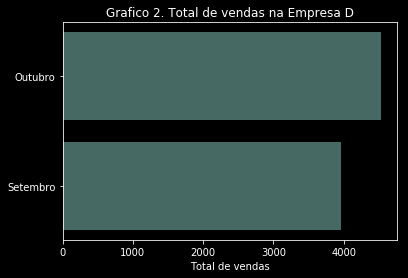

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#-- vendas de setembro
#select id_transaction as'codigo_venda', insert_date as 'data' , value as 'total'  from transaction t 
#where id_sales_unit=10 and month(insert_date)=9
#order by insert_date;

#vendas de outubro
#select id_transaction as'codigo_venda', insert_date as 'data' , value as 'total'  from transaction t 
#where id_sales_unit=10 and month(insert_date)=10
#order by insert_date;


vendas_setembro=pd.read_csv('empresa10vendassetembro.csv', parse_dates=[1])
vendas_outubro=pd.read_csv('empresa10vendasoutubro.csv', parse_dates=[1])

total_mensal =np.array([vendas_setembro['codigo_venda'].count(),vendas_outubro['codigo_venda'].count()])
plt.style.use(('dark_background'))

plt.barh(['Setembro', 'Outubro'], total_mensal, align='center', alpha=0.5)
plt.xlabel('Total de vendas')
plt.title('Grafico 2. Total de vendas na Empresa D')
plt.show()

<p> Indo mais a fundo, percebemos que <span style="font-weight:bold"> a semana de pico de outubro, também teve desempenho superior em relação a semana de maior quantidade de vendas de Setembro</span>. Essa variação considerável pode estar relacionada com alguns fatores.</p>
<p> A segunda semana de Outubro, semana 41, precedeu o feriado do Dia das Crianças o que seria uma boa justificativa para o aumento no volume de vendas. Além disso, o ambiente de incerteza pré primeiro turno das Eleições Presidenciais impactou no valor de câmbio do Dólar, causando significante desvalorização deste. Em um cenário onde produtos ofertados pela Empresa D fossem impactados diretamente pela taxa de câmbio, seja no seu valor, ou no valor do frete, uma queda no valor do dólar certamente impulsionaria um volume maior de compras.</p>

Text(0.5, 1.0, 'Grafico 3. Semanas de pico de cada mês')

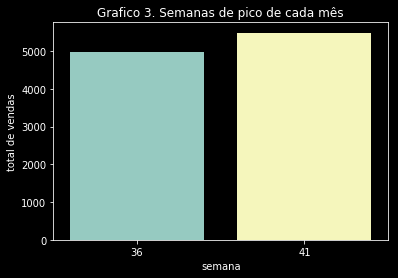

In [3]:
#Melhor semana de setembro
#select week(insert_date,6) as 'semana', count(*) as 'total de vendas' from transaction t
#where month(insert_date)=9
#group by week(insert_date,6)
#order by 2 desc limit 1;

#Melhor semana de Outubro
#select week(insert_date,6) as 'semana', count(*) as 'total de vendas' from transaction t
#where month(insert_date)=10
#group by week(insert_date,6)
#order by 2 desc limit 1;

melhorSemanaOutubro=pd.read_csv('empresa10melhorsemana10.csv') 
melhorSemanaSetembro=pd.read_csv('empresa10melhorsemana9.csv')
melhorSemana=melhorSemanaSetembro.append(melhorSemanaOutubro)
sns.barplot(x='semana', y='total de vendas', data=melhorSemana)
plt.title('Grafico 3. Semanas de pico de cada mês')

<p> Buscando estratégias para melhorar o desempenho, me ative a outros indicadores. Obtemos o montante de todas as vendas e tentamos, a princípio, utilizar um histograma para observar a distribuição dos valores das compras.No entanto, dado o grande volume de dados, a visualização dos dados foi comprometida. Como alternativa, utilizaremos de um rugplot a fim de se analizar de maneira melhor <span style="font-weight:bold">Percebemos que uma grande maioria das compras posuem valor variando entre 150 e 250,</span> denunciando que a maioria das compras tem um valor total alto. Com isto em vista, aplicar politicas como diminuição do valor do frete em compras acima de certo valor  e/ou descontos progressivos de acordo com o valor da compra pode ser uma boa opção de incentivo aos clientes, sobretudo nas ultimas semanas do mês, onde o volume de vendas costuma ser menor em relação as primeiras semanas, nas quais a grande maioria das pessoas recebem seu salário</p>


Text(0.5, 0, 'Valor total da compra em $')

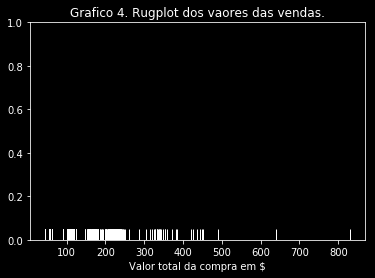

In [4]:
#Grafico 4. Histograma/Screeplot dos valores ds vendas
#SELECT value from transaction t
#WHERE t.id_sales_unit=10;


import numpy as np
valores = pd.read_csv('empresa10valorcompra.csv')
npvalores=valores.values
sns.rugplot(npvalores)
plt.title('Grafico 4. Rugplot dos vaores das vendas.')
plt.xlabel('Valor total da compra em $')



<p> Direcionando a análise para o comportamento do cliente, <span style="font-weight:bold">verificamos que clientes reincidentes são uma porção majoritária</span>, como pode ser constatado com o comando:</p> select id_user as 'cliente', count(*) as 'compras' from transaction t
where t.id_sales_unit=10
group by id_user
order by count(*) desc;
<br>




<p>Elencamos, também, os produtos mais vendidas da Empresa 10.</p><br>

Text(0.5, 0, 'Unidades vendidas')

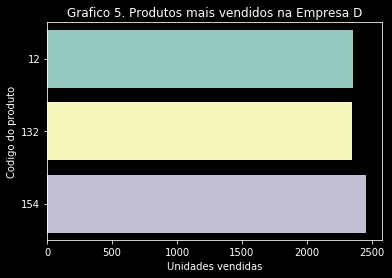

In [5]:
#select p.id_product as 'produto' , count(*) as 'unidades_vendidas' from product_order p
#join transaction t on p.id_transaction=t.id_transaction
#WHERE t.id_sales_unit=10
#group by 1
#order by 2 desc limit 3;

produtosMaisVendidos=pd.read_csv('empresa10produtosmaisvendidos.csv')
sns.barplot(y='produto', x='unidades_vendidas', data=produtosMaisVendidos, orient='h')
plt.title('Grafico 5. Produtos mais vendidos na Empresa D')
plt.ylabel('Codigo do produto')
plt.xlabel('Unidades vendidas')


<p>Somando essas duas informações e com o objetivo de se conhecer melhor o comportamento dos clientes, a Empresa D poderia adicionar mais uma coluna na tabela product, a coluna categorias. Agrupando os produtos oferecidos na loja por categoria, facilitaria a identificação de perfis de compra dos clientes, verificando quais categorias são adquiridas com mais frequência por cada cliente. Desta forma, se é explícito que um cliente tem preferência por produtos da categoria de vestimentas e calçados, por exemplo, torna-se mais assertivo direcionamento de campanhas de marketing, aumentando a probabilidade de concretização de compras. Além disso, o cliente tem a sensação de receber um serviço personalizado, adequado com suas expectativas, sendo mais um ponto positivo na sua decisão de onde comprar.</p>